<a href="https://colab.research.google.com/github/dsamsonov1/to2rep/blob/main/fmu_paper_stubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-rf
!pip install -U kaleido
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


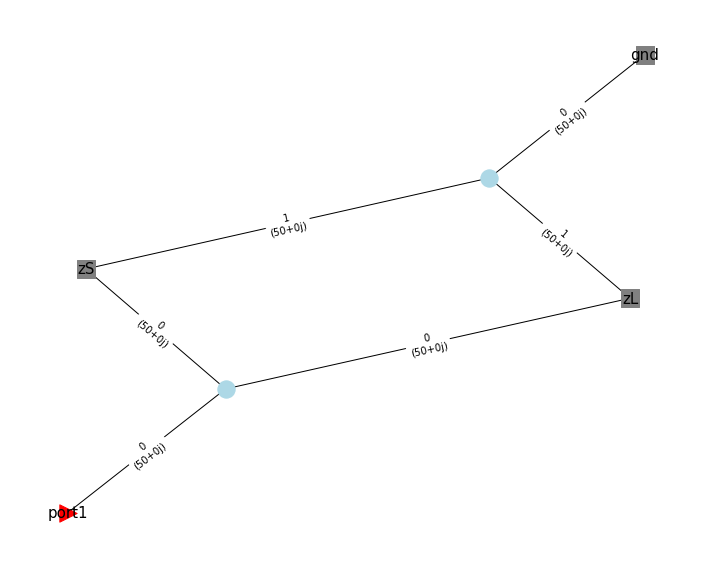

In [10]:
import numpy as np
import skrf as rf
from skrf.media.definedAEpTandZ0 import DefinedAEpTandZ0
from matplotlib import pyplot as plt


z1 = 10
z2 = 20

line = DefinedAEpTandZ0(frequency=freq, ep_r=2.5, A=0.3, Z0=50)
#            line0 = DefinedAEpTandZ0(frequency=freq)
#            zL = line0.resistor(R=z1+z2*1j, name='zL')
zL = line.resistor(R=z1+z2*1j, name='zL')
zS = line.line(d=x, unit='rad', name='zS')
gnd = rf.Circuit.Ground(freq, name='gnd')
port1 = rf.Circuit.Port(freq, name='port1', z0=50)
            
cnx = [
       [(port1, 0), (zL, 0), (zS, 0)],
       [(zL, 1), (zS, 1), (gnd, 0)]
      ]
        
c = rf.Circuit(cnx)

c.plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=10)

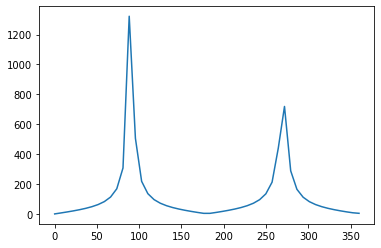

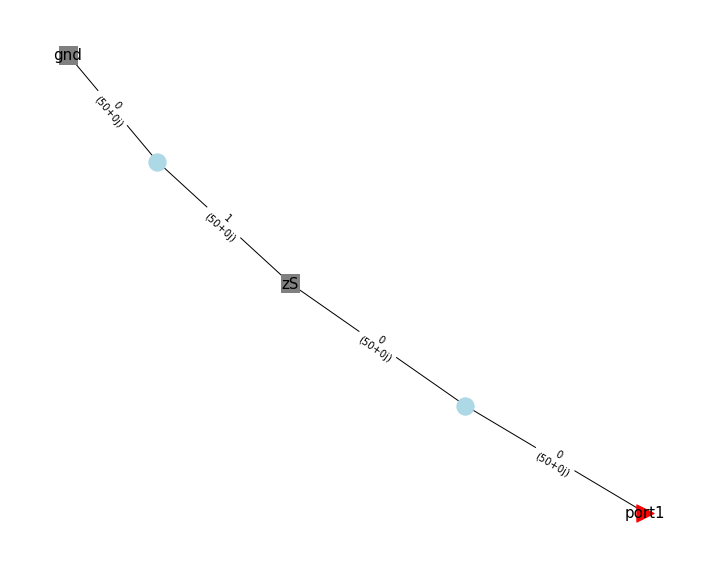

In [62]:
import numpy as np
import skrf as rf
from skrf.media.definedAEpTandZ0 import DefinedAEpTandZ0
from matplotlib import pyplot as plt

freq = rf.Frequency.from_f([80], 'MHz')
line1 = DefinedAEpTandZ0(frequency=freq, ep_r=2.5, A=0.3, f_A=80e6, Z0=50)
gnd = rf.Circuit.Ground(freq, name='gnd')
port1 = rf.Circuit.Port(freq, name='port1', z0=50)
xs = np.linspace(0, 360, 50)

abs_zins = []

for x in xs:
  zS = line1.line(x, unit='deg', name='zS')
  cnx = [
         [(port1, 0), (zS, 0)],
         [(zS, 1), (gnd, 0)]
        ]
       
  c = rf.Circuit(cnx)
  s11 = c.network.s[0,0,0]
  abs_zin = abs((1+s11)/(1-s11)*50)
  abs_zins.append(abs_zin)

plt.plot(xs, abs_zins)
c.plot_graph(network_labels=True, network_fontsize=15,
               port_labels=True, port_fontsize=15,
              edge_labels=True, edge_fontsize=10)


In [69]:
import numpy as np
import skrf as rf
from skrf.media.definedAEpTandZ0 import DefinedAEpTandZ0
from matplotlib import pyplot as plt
from numba import prange

freq = rf.Frequency.from_f([80], 'MHz')
xs = np.linspace(0, 2*np.pi, 100)
#xs = np.linspace(0, 1200, 50)
z1s = np.linspace(1, 200, 100)
z2s = np.linspace(-100, 100, 100)
xmin = np.empty((z1s.shape[0], z2s.shape[0]))
gmin = np.empty_like(xmin)

for i, z1 in enumerate(z1s):
    for j, z2 in enumerate(z2s):
        g = []
        print(f'{i*z2s.shape[0] + (j+1)}/{z1s.shape[0]*z2s.shape[0]}')
        for x in xs:
            line_medium = DefinedAEpTandZ0(frequency=freq, ep_r=2.5, A=0.3, f_A=80e6, Z0=50)
#            line0 = DefinedAEpTandZ0(frequency=freq)
#            zL = line0.resistor(R=z1+z2*1j, name='zL')
            zL = line_medium.resistor(R=z1+z2*1j, name='zL')
            zS = line_medium.line(d=x, unit='rad', name='zS')
#            zS = line.line(x, unit='mm', name='zS')
            gnd = rf.Circuit.Ground(freq, name='gnd')
            port1 = rf.Circuit.Port(freq, name='port1', z0=50)
            
            cnx = [
                  [(port1, 0), (zL, 0), (zS, 0)],
                  [(zL, 1), (zS, 1), (gnd, 0)]
                  ]
        
            c = rf.Circuit(cnx)
            '''
            Z_IN = c.network.z[0,0,0]
            
            g.append(np.abs((Z_IN-50)/(Z_IN+50))**2)
            '''
            s11 = c.network.s[0,0,0]
            zin = (1+s11)/(1-s11)*50
#            print (f'Zl: {zL.a_im}; x: {x}; s11: {s11}; Zin: {zin}')
            g.append(np.abs((zin-50)/(zin+50))**2)
            
        #plt.plot(xs, np.log10(g))
        ind = np.argmin(g)
        xmin[i,j] = xs[ind]
        gmin[i,j] = g[ind]
        print(gmin[i,j])

plt.contourf(z1s, z2s, np.transpose(xmin))
#plt.contourf(z1s, z2s, g)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('$L, rad$', rotation=270, fontsize=15)
plt.xlabel('$Re(Z_L)$')
plt.ylabel('$Im(Z_L)$')
#plt.contourf(z1s, z2s, gmin)

plt.show()

SyntaxError: ignored